In [ ]:
# Importação das bibliotecas principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("chik0di/board-games-dataset-complete-features")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'board-games-dataset-complete-features' dataset.
Path to dataset files: /kaggle/input/board-games-dataset-complete-features


In [ ]:

df_csv=pd.read_csv(path+"/boardgame-geek-dataset_organized.csv")

In [ ]:
df_csv.head()

,row_id,boardgame,release_year,min_players,max_players,min_playtime,max_playtime,minimum_age,avg_rating,num_ratings,...,rank_strategy,rank_thematic,rank_family,rank_war,rank_customizable,rank_abstract,rank_party,rank_childrens,url,description
0,1,Brass: Birmingham,2018,2,4,60,120,14,8.575,53548,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://boardgamegeek.com/boardgame/224517/bra...,"Build networks, grow industries, and navigate ..."
1,2,Pandemic Legacy: Season 1,2015,2,4,60,60,13,8.512,56071,...,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,https://boardgamegeek.com/boardgame/161936/pan...,Mutating diseases are spreading around the wor...
2,3,Ark Nova,2021,1,4,90,150,14,8.539,54528,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://boardgamegeek.com/boardgame/342942/ark...,"Plan and build a modern, scientifically manage..."
3,4,Gloomhaven,2017,1,4,60,120,14,8.557,65443,...,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,https://boardgamegeek.com/boardgame/174430/glo...,Vanquish monsters with strategic cardplay. Ful...
4,5,Twilight Imperium: Fourth Edition,2017,3,6,240,480,14,8.572,26686,...,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,https://boardgamegeek.com/boardgame/233078/twi...,"Build an intergalactic empire through trade, r..."


In [ ]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   row_id             2000 non-null   int64  
 1   boardgame          2000 non-null   object 
 2   release_year       2000 non-null   int64  
 3   min_players        2000 non-null   int64  
 4   max_players        2000 non-null   int64  
 5   min_playtime       2000 non-null   int64  
 6   max_playtime       2000 non-null   int64  
 7   minimum_age        2000 non-null   int64  
 8   avg_rating         2000 non-null   float64
 9   num_ratings        2000 non-null   int64  
 10  complexity         2000 non-null   float64
 11  rank_overall       2000 non-null   int64  
 12  owned              2000 non-null   int64  
 13  wishlisted         2000 non-null   int64  
 14  total_plays        2000 non-null   int64  
 15  fans               2000 non-null   int64  
 16  page_views         2000 

In [ ]:
if 'avg_rating' in df_csv.columns:
    avg_rating = df_csv['avg_rating'].dropna()

    print("Media de notas:")

    print(f"Média: {avg_rating.mean():.2f}")

else:
    print("Coluna 'avg_rating' não encontrada no dataset")

Media de notas:
Média: 7.42


In [ ]:
if 'max_playtime' in df_csv.columns:
    max_playtime = df_csv['max_playtime'].dropna()

    print("Media de tempo:")

    print(f"Média: {max_playtime.mean():.2f}")
    print(f"Desvio Padrão: {max_playtime.std():.2f}")
else:
    print("Coluna 'max_playtime' não encontrada no dataset")

Media de tempo:
Média: 88.70
Desvio Padrão: 89.12


In [ ]:
print("\nValores nulos por coluna:")
print(df_csv.isnull().sum())


Valores nulos por coluna:
row_id                  0
boardgame               0
release_year            0
min_players             0
max_players             0
min_playtime            0
max_playtime            0
minimum_age             0
avg_rating              0
num_ratings             0
complexity              0
rank_overall            0
owned                   0
wishlisted              0
total_plays             0
fans                    0
page_views              0
amazon_price          882
std_deviation           0
comments                0
monthly_plays           0
previously_owned        0
for_trade               0
want_trade              0
rating_1                0
rating_2                0
rating_3                0
rating_4                0
rating_5                0
rating_6                0
rating_7                0
rating_8                0
rating_9                0
rating_10               0
categories              5
mechanics               3
families               11
designers  

In [ ]:
print("\nValores nulos em average_rating:", df_csv['avg_rating'].isnull().sum())



Valores nulos em average_rating: 0


In [ ]:
mediana = df_csv['avg_rating'].median()
df_csv['avg_rating'] = df_csv['avg_rating'].fillna(mediana)
# Resposta: a mediana é mais robusta contra outliers do que a média

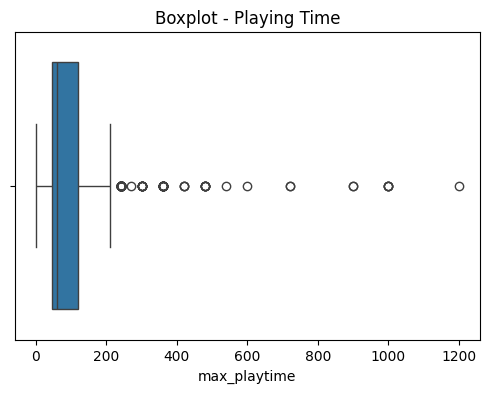

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_csv['max_playtime'])
plt.title("Boxplot - Playing Time")
plt.show()

In [ ]:
Q1 = df_csv['max_playtime'].quantile(0.25)
Q3 = df_csv['max_playtime'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_csv[(df_csv['max_playtime'] < (Q1 - 1.5 * IQR)) | (df_csv['max_playtime'] > (Q3 + 1.5 * IQR))]
print(f"\nQuantidade de outliers em playing_time: {outliers.shape[0]}")


Quantidade de outliers em playing_time: 108


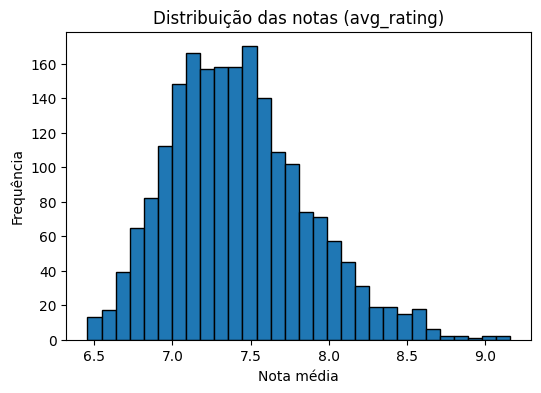

In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(df_csv['avg_rating'], bins=30, edgecolor='black')
plt.title("Distribuição das notas (avg_rating)")
plt.xlabel("Nota média")
plt.ylabel("Frequência")
plt.show()
##a distribuição é positiva

In [ ]:
df_csv['log_playing_time'] = df_csv['max_playtime'].apply(lambda x: np.log(x+1))  # +1 evita log(0)


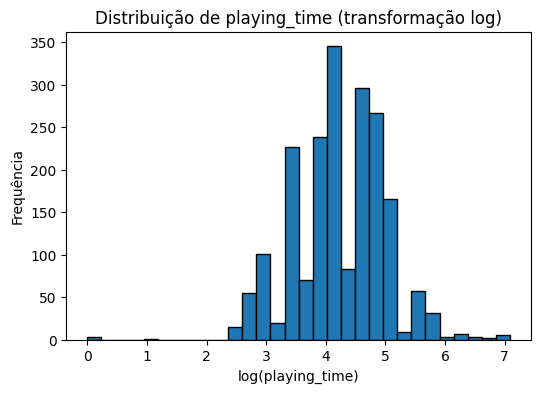

In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(df_csv['log_playing_time'], bins=30, edgecolor='black')
plt.title("Distribuição de playing_time (transformação log)")
plt.xlabel("log(playing_time)")
plt.ylabel("Frequência")
plt.show()
##esta mais organizado

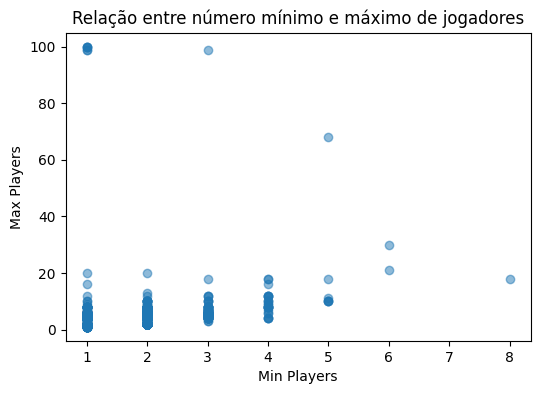

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(df_csv['min_players'], df_csv['max_players'], alpha=0.5)
plt.xlabel("Min Players")
plt.ylabel("Max Players")
plt.title("Relação entre número mínimo e máximo de jogadores")
plt.show()


In [ ]:
corr = df_csv.corr(numeric_only=True)

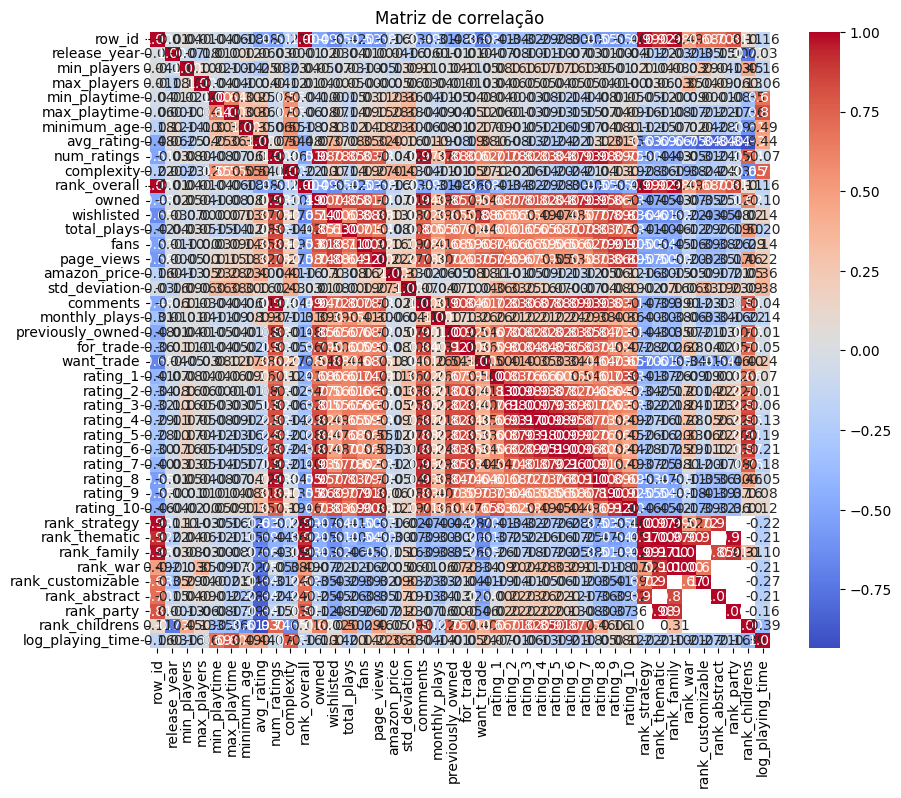

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlação")
plt.show()
# - O par de colunas com maior correlação positiva é aquele com valor mais próximo de +1
# - O par mais próximo de zero indica praticamente nenhuma relação

In [ ]:
if 'release_year' in df_csv.columns:
    # 2. Criar coluna "Decada"
    df_csv['Decada'] = (df_csv['release_year'] // 10) * 10

    # 3. Contagem de jogos por década
    contagem = df_csv['Decada'].value_counts().sort_index()
    print("\nQuantidade de jogos por década:")
    print(contagem)

    # 4. Resposta em comentário:
    # Década com maior número de lançamentos é 2010 com:1031

else:
    print("Coluna 'release_year' não encontrada")


Quantidade de jogos por década:
Decada
0          3
1470       1
1580       1
1630       1
1800       1
1810       1
1850       1
1870       1
1920       1
1950       1
1960       2
1970       9
1980      25
1990      74
2000     280
2010    1031
2020     567
Name: count, dtype: int64
